## IMPORTING LIBRARIES

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## DATA PREPROCESSING

In [18]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [19]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## To avoid overshooting

   1. avoid using high learning rate , default learning rate is 0.001 we are using 0.0001
   2. there may be a chance of underfitting, so increase number of neurons.
   3. Add more convolution to extract more feature from image , there may be possibility that model unable to capture relevant
      feature or model is confusing due to lack of feature to feed with simple feature.

## Building model

In [20]:
cnn = tf.keras.models.Sequential()

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [26]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [27]:
cnn.add(tf.keras.layers.Flatten())

In [28]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [29]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [30]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

## Compiling and Training Phase

In [31]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [34]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 2131s 970ms/step - loss: 1.1582 - accuracy: 0.6517 - val_loss: 0.4976 - val_accuracy: 0.8409
Epoch 2/10
2197/2197 [==============================] - 2089s 950ms/step - loss: 0.4295 - accuracy: 0.8632 - val_loss: 0.3603 - val_accuracy: 0.8829
Epoch 3/10
2197/2197 [==============================] - 2072s 943ms/step - loss: 0.2608 - accuracy: 0.9159 - val_loss: 0.2370 - val_accuracy: 0.9227
Epoch 4/10
2197/2197 [==============================] - 2326s 1s/step - loss: 0.1796 - accuracy: 0.9421 - val_loss: 0.1528 - val_accuracy: 0.9506
Epoch 5/10
2197/2197 [==============================] - 2463s 1s/step - loss: 0.1383 - accuracy: 0.9544 - val_loss: 0.2664 - val_accuracy: 0.9191
Epoch 6/10
2197/2197 [==============================] - 2196s 999ms/step - loss: 0.1027 - accuracy: 0.9663 - val_loss: 0.1651 - val_accuracy: 0.9458
Epoch 7/10
2197/2197 [==============================] - 2028s 923ms/step - loss: 0.0875 - accuracy: 0.9715 - val

## Evaluating Model

In [35]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
formatted_train_acc = "{:.2f}".format(train_acc * 100)
print('Training accuracy:', formatted_train_acc)

2197/2197 [==============================] - 776s 353ms/step - loss: 0.0138 - accuracy: 0.9959
Training accuracy: 99.59


In [36]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
formatted_val_acc = "{:.2f}".format(val_acc * 100)
print('Validation accuracy:', formatted_val_acc)

550/550 [==============================] - 187s 340ms/step - loss: 0.0889 - accuracy: 0.9730
Validation accuracy: 97.30


In [37]:
training_history.history #Return Dictionary of history

{'loss': [1.1582365036010742,
  0.4294527769088745,
  0.2607724964618683,
  0.1795862466096878,
  0.13830271363258362,
  0.10269217938184738,
  0.08745267987251282,
  0.0730898454785347,
  0.0611041858792305,
  0.05637573078274727],
 'accuracy': [0.6517106294631958,
  0.863205075263977,
  0.9158973097801208,
  0.9420726895332336,
  0.9543779492378235,
  0.9663134217262268,
  0.9715484976768494,
  0.976385235786438,
  0.9802688956260681,
  0.9824454188346863],
 'val_loss': [0.4975823760032654,
  0.36029815673828125,
  0.23701806366443634,
  0.15279726684093475,
  0.2664148807525635,
  0.16506101191043854,
  0.2013990581035614,
  0.14163269102573395,
  0.20059239864349365,
  0.08888286352157593],
 'val_accuracy': [0.840883195400238,
  0.8829387426376343,
  0.9227179884910583,
  0.9506032466888428,
  0.9191327095031738,
  0.9458228945732117,
  0.9429205656051636,
  0.9562941193580627,
  0.9426360130310059,
  0.9730252623558044]}

## Recording History in JSON

In [38]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [39]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

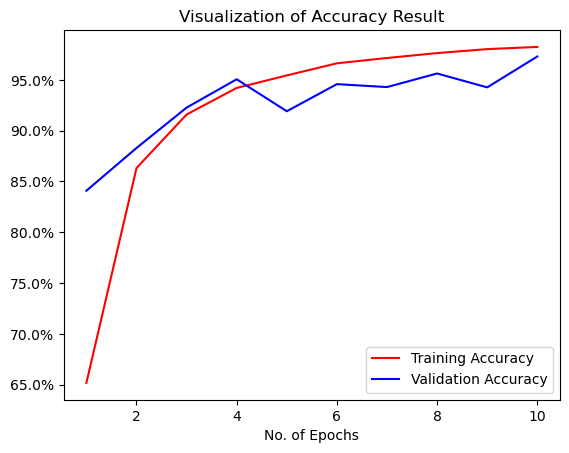

In [40]:
# epochs = [i for i in range(1,11)]
# plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
# plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
# plt.xlabel('No. of Epochs')
# plt.title('Visualization of Accuracy Result')
# plt.legend()
# plt.show()

import matplotlib.ticker as mticker
epochs = [i for i in range(1,11)]
fig, ax = plt.subplots()
ax.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
ax.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
ax.set_xlabel('No. of Epochs')
ax.set_title('Visualization of Accuracy Result')
ax.legend()
# Format y-axis labels as percentages with one decimal place
formatter = mticker.FuncFormatter(lambda x, _: '{:.1f}%'.format(x * 100))
ax.yaxis.set_major_formatter(formatter)
plt.show()

## Other metrics

In [41]:
class_name = validation_set.class_names

In [42]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [43]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 412s 23ms/step


In [44]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [45]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [46]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [48]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.96      0.97       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.99      0.91      0.95       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.92      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.

## Confusion Matrix Visualization

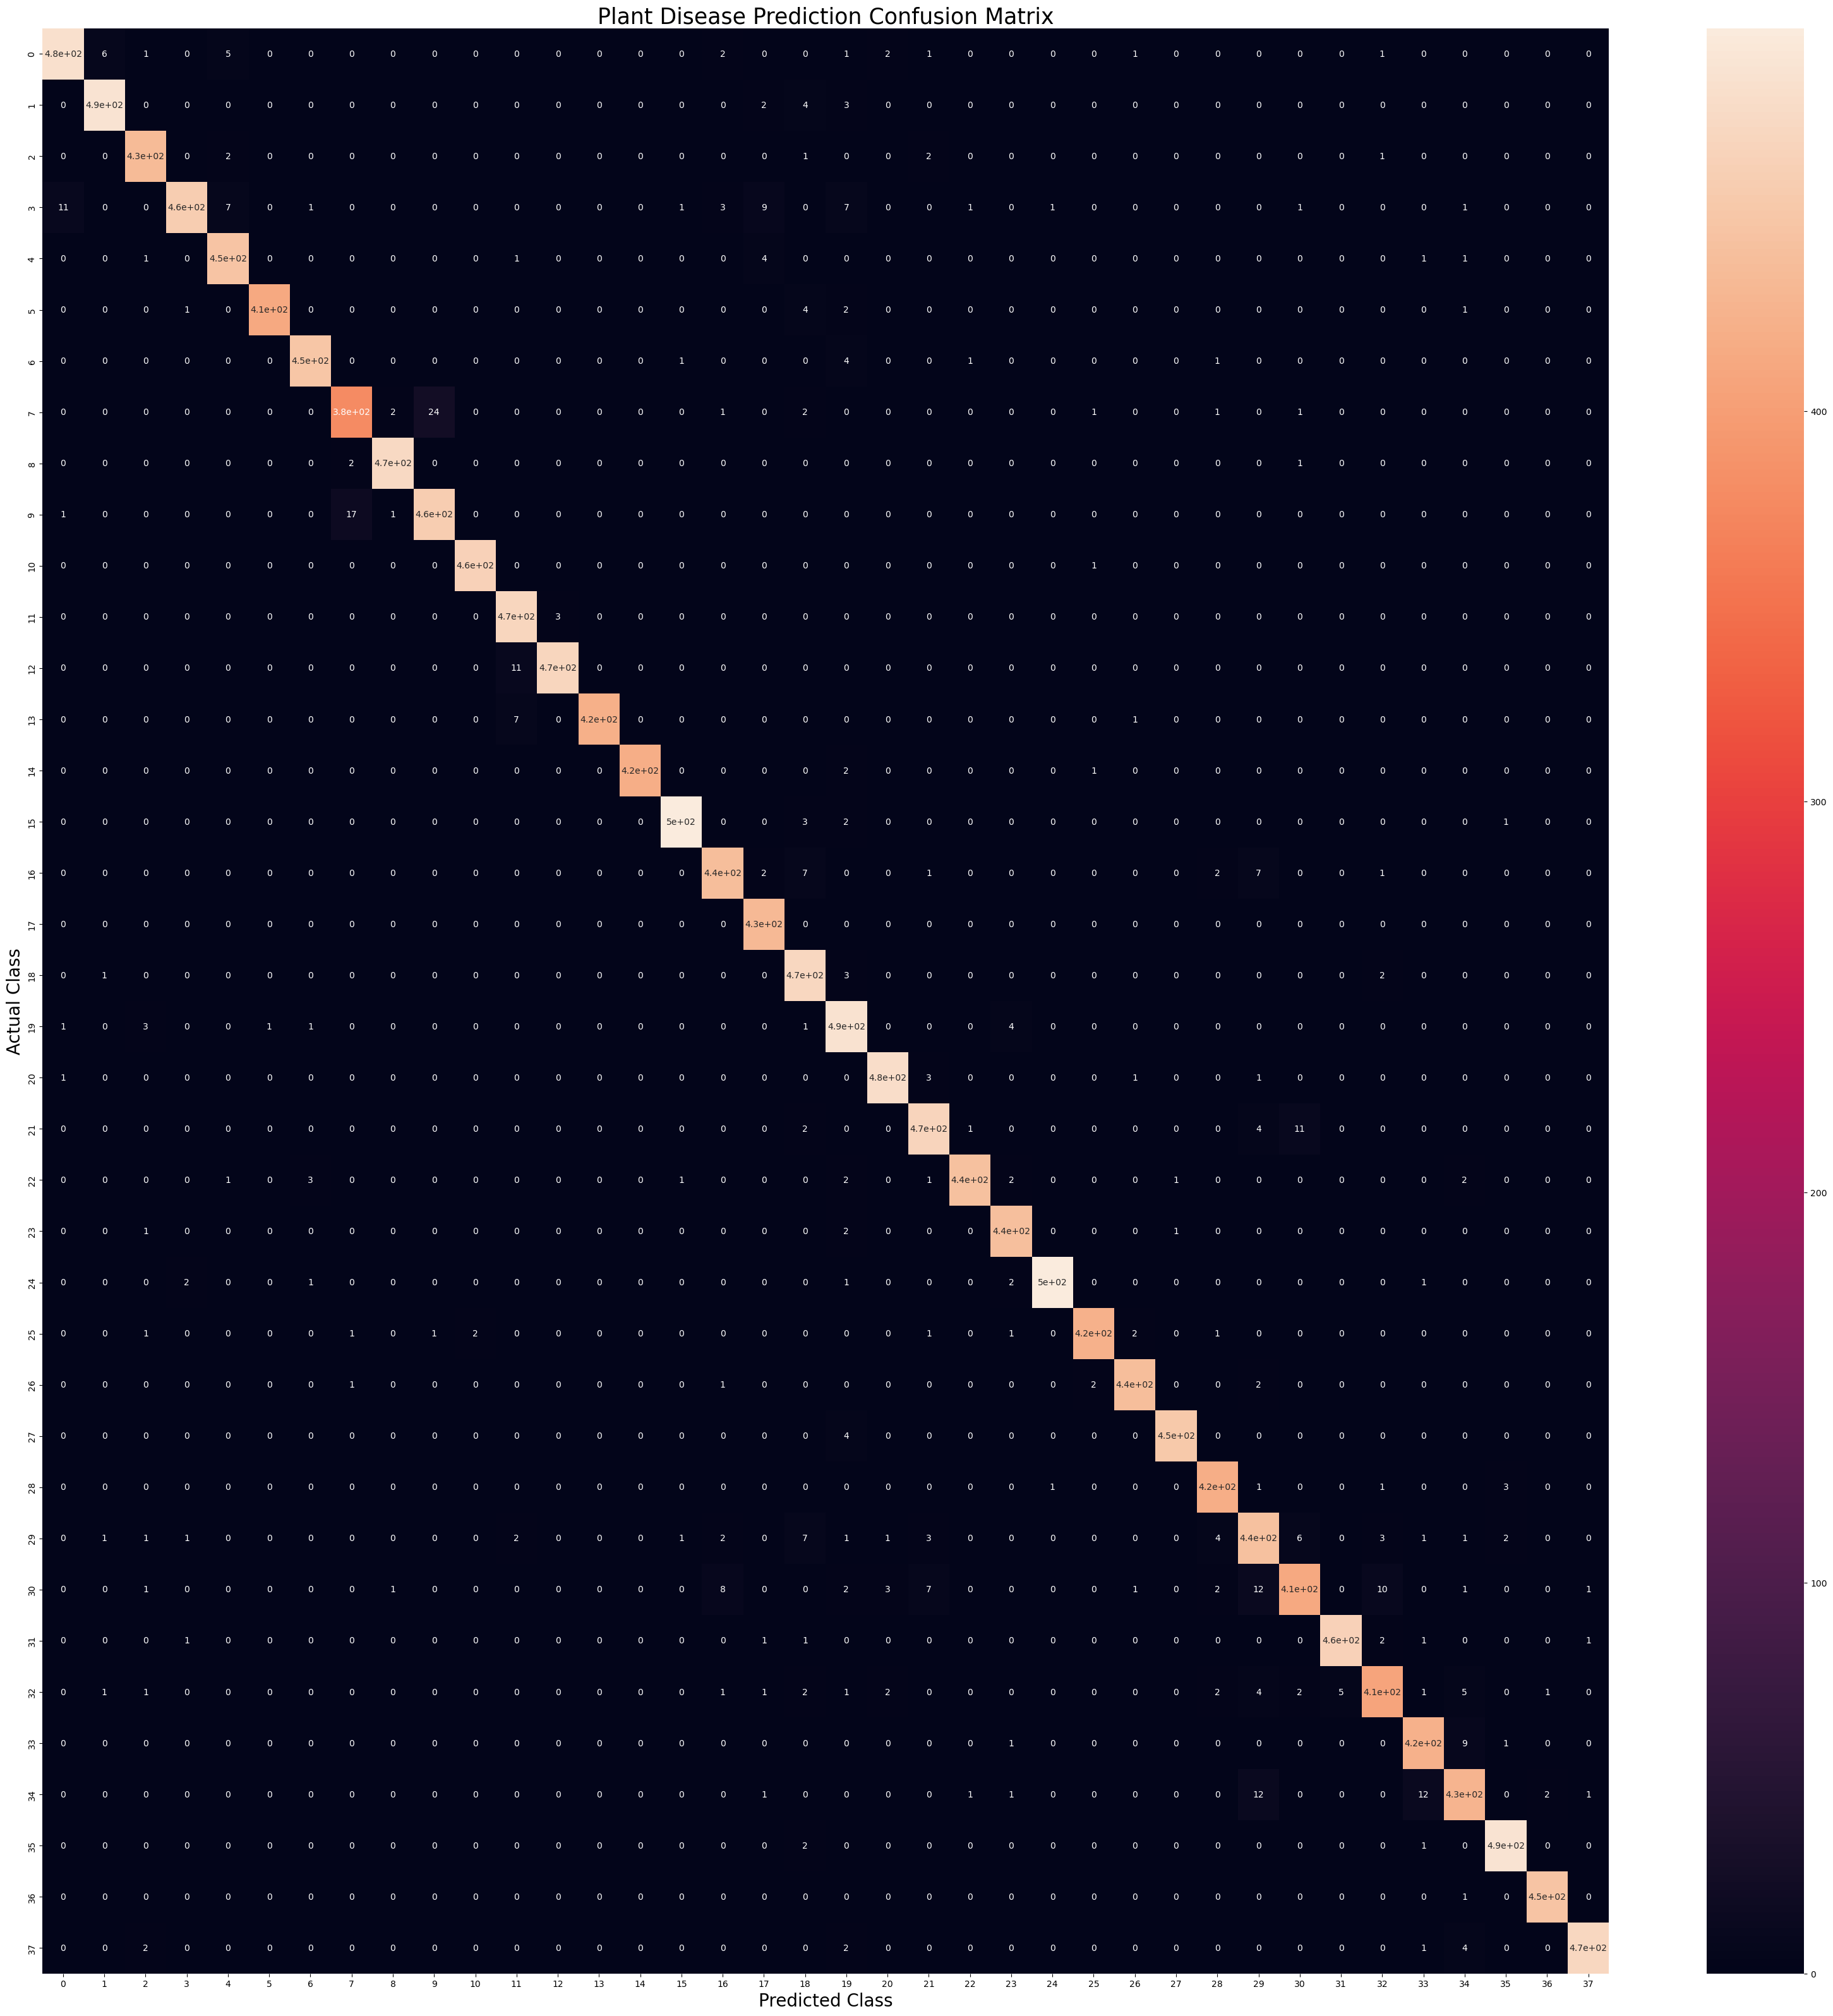

In [49]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

## Saving Model

In [58]:
cnn.save('trained_model.h5')

C:\Users\janha\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
from keras.models import save_model
cnn.save('plant_classifier.keras')

In [57]:
# model.save('model_inception.keras')
import os
model_dir = r"C:\Users\janha\OneDrive\Pictures\PROJECT\JANHAVI DATABASE\models1"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    model_version = max([int(i) for i in os.listdir(model_dir)] + [0]) + 1
    cnn.save(f"{model_dir}/{model_version}")

INFO:tensorflow:Assets written to: C:\Users\janha\OneDrive\Pictures\PROJECT\JANHAVI DATABASE\models1/1\assets


INFO:tensorflow:Assets written to: C:\Users\janha\OneDrive\Pictures\PROJECT\JANHAVI DATABASE\models1/1\assets
